# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata,study_results, on="Mouse ID", how='right')
# Display the data table for preview
mouse_data_df = mouse_data_df[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
mouse_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [98]:
# Checking the number of mice.
mouse_total = mouse_data_df['Mouse ID'].value_counts()
len(mouse_total)

249

In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_ID = mouse_data_df.loc[mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
mouse_ID


array(['g989'], dtype=object)

In [100]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_df.loc[(mouse_data_df['Mouse ID']=="g989")]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [101]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID
mouse_drop = mouse_data_df[mouse_data_df['Mouse ID'].isin(mouse_ID)==False]
clean_mouse = mouse_drop
clean_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [102]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_total = clean_mouse['Mouse ID'].value_counts()
len(clean_mouse_total)

248

## Summary Statistics

In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_regimen_mean = clean_mouse.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_regimen_median = clean_mouse.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumor_regimen_variance = clean_mouse.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_regimen_std = clean_mouse.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_regimen_sem = clean_mouse.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({'Mean Tumor Volume': tumor_regimen_mean, 'Median Tumor Volume': tumor_regimen_median,
               'Tumor Volume Variance': tumor_regimen_variance, 'Tumor Volume Std. Dev.': tumor_regimen_std,
               'Tumor Volume Std. Err.': tumor_regimen_sem})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df_agg = clean_mouse.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

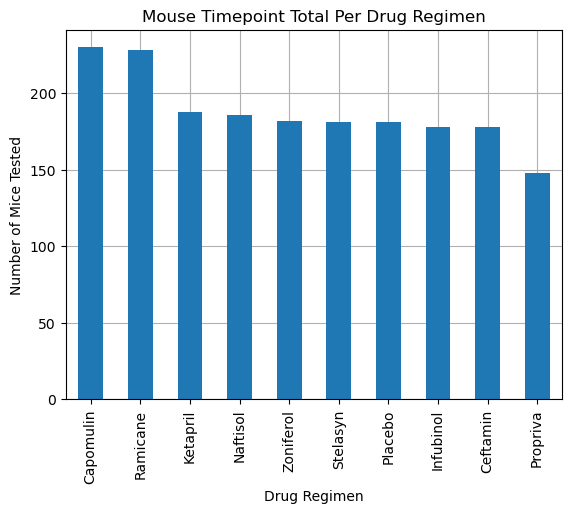

In [105]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Count Mice tested per drug regimen
mice_per_regimen = clean_mouse['Drug Regimen'].value_counts()

# Create Plot
mouse_bar = mice_per_regimen.plot(kind='bar', zorder= 2)

# Set Labels and Grid
mouse_bar.set_title("Mouse Timepoint Total Per Drug Regimen")
mouse_bar.set_xlabel("Drug Regimen")
mouse_bar.set_ylabel("Number of Mice Tested")
mouse_bar.grid(zorder=0)


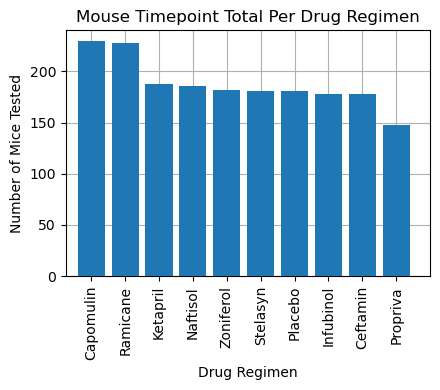

In [106]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set X axis value 
mice_index = mice_per_regimen.index
x_axis = mice_index

# Create Plot
plt.figure(figsize=(4.5,4))
plt.bar(x_axis, mice_per_regimen, alpha=1, align="center", zorder=3)

# Set Ticks for X axis
plt.xticks(rotation="vertical")

# Set Limits
plt.xlim(-.75, len(x_axis))
plt.ylim(0, max(mice_per_regimen)+10)

# Set Labels and Grid
plt.title("Mouse Timepoint Total Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.grid(zorder=0)
plt.tight_layout()
plt.show()


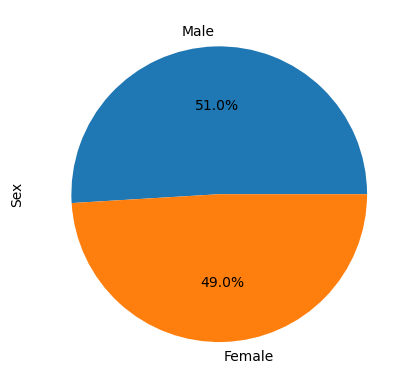

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count male vs. female mice
mouse_gender_count = clean_mouse['Sex'].value_counts()

# Create Plot
mouse_gender_count.plot.pie(autopct="%1.1f%%")
plt.show()

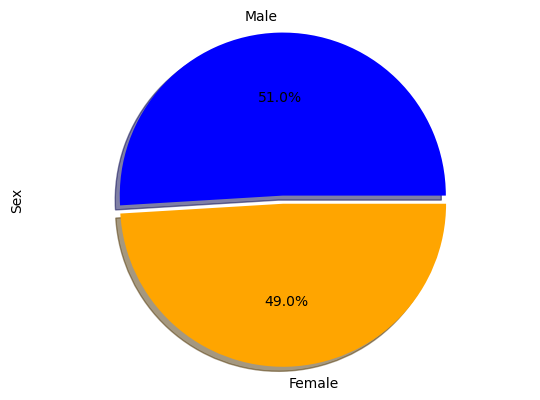

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Define Labels from DataFrame
mouse_gender = mouse_gender_count.index

# Labels for the sections of our pie chart
labels = mouse_gender

# The values of each section of the pie chart
count = mouse_gender_count

# The colors of each section of the pie chart
colors = ['blue', 'orange']

# Tells matplotlib to separate the "Male" section from the others
explode = (0.05, 0)

# Creates the pie chart based upon the values above
plt.pie(count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, explode= explode)
plt.ylabel('Sex')

# Create axes which are equal so we have a perfect circle
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_mouse.groupby(['Mouse ID'])['Timepoint'].max().reset_index()
last_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = last_timepoint_df[['Mouse ID', 'Timepoint']].\
merge(mouse_data_df, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [165]:
# Put treatments into a list for for loop (and later for plot labels)

# Create list of drugs
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug_regimen in regimen:

    drug = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == drug_regimen, 'Tumor Volume (mm3)']
    tumor_vol_data.append(drug)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = drug.quantile([.25,.5,.75]).round(2)
    lowerq = round(quartiles[0.25],2)
    upperq = round(quartiles[0.75],2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    # Determine outliers using upper and lower bounds
    outliers = drug.loc[(drug >= upper_bound) |
                              (drug <= lower_bound)]
    
    # Print findings to double check data
    print(f"IQR for {drug_regimen}: {iqr}")
    print(f"lower bound for {drug_regimen}: {lower_bound}")
    print(f"upper bound for {drug_regimen}: {upper_bound}")
    print(f"For {drug_regimen}, values below {lower_bound} could be outliers")
    print(f"For {drug_regimen}, values above {upper_bound} could be outliers")
    print(f"For {drug_regimen} the outliers are: {outliers}")
    print('')

    

IQR for Capomulin: 7.78
lower bound for Capomulin: 20.71
upper bound for Capomulin: 51.83
For Capomulin, values below 20.71 could be outliers
For Capomulin, values above 51.83 could be outliers
For Capomulin the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)

IQR for Ramicane: 9.1
lower bound for Ramicane: 17.91
upper bound for Ramicane: 54.31
For Ramicane, values below 17.91 could be outliers
For Ramicane, values above 54.31 could be outliers
For Ramicane the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)

IQR for Infubinol: 11.48
lower bound for Infubinol: 36.83
upper bound for Infubinol: 82.75
For Infubinol, values below 36.83 could be outliers
For Infubinol, values above 82.75 could be outliers
For Infubinol the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

IQR for Ceftamin: 15.58
lower bound for Ceftamin: 25.35
upper bound for Ceftamin: 87.67
For Ceftamin, values below 25.35 could be outliers
For Ceftamin, values ab

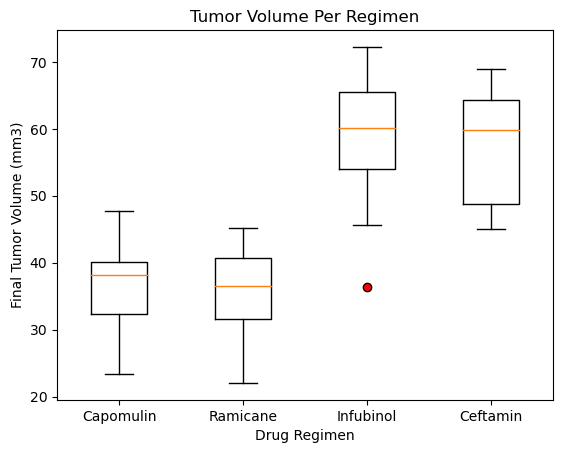

In [170]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Set value that makes our flier prop red
dot = dict(markerfacecolor = 'red')

# Create Plot
plt.boxplot(tumor_vol_data, labels= regimen, flierprops= dot)
plt.title('Tumor Volume Per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

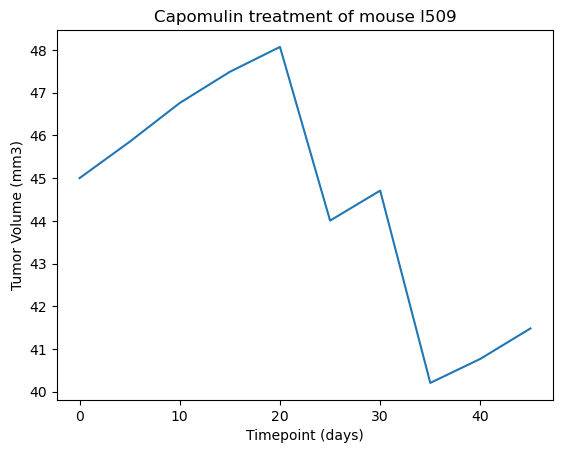

In [174]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Locate all data for mouse L509 in the DataFrame
I509 = clean_mouse.loc[clean_mouse['Mouse ID'] == 'l509']

# Set X and Y values
x_axis = I509['Timepoint']
y_axis = I509['Tumor Volume (mm3)']

# Create plot
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()


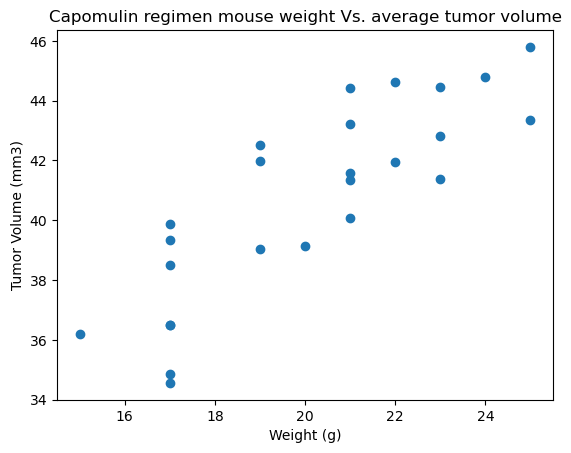

In [183]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Locate all mice tested with Capomulin in the DataFrame
cap = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin']

# Calculate average for all mice 
tumor_avg = cap.groupby(['Mouse ID']).mean()

# Set X and Y values
weight = tumor_avg['Weight (g)']
volume = tumor_avg['Tumor Volume (mm3)']

# Create plot
plt.scatter(weight,volume)
plt.title('Capomulin regimen mouse weight Vs. average tumor volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

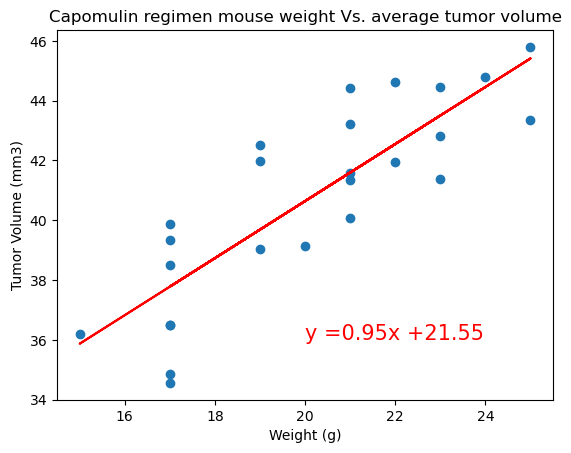

In [192]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation coefficient
cor_coef = round(st.pearsonr(weight,volume)[0],2)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress (weight, volume)

# Calculate regression values
regress_values = weight * slope + intercept

# Create Line Equation
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

# Create plot
plt.scatter(weight,volume)
plt.plot(weight, regress_values, 'r-')
plt.title('Capomulin regimen mouse weight Vs. average tumor volume')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()